**SETUP a Pysaprk environment.**

In [0]:
!apt-get update
!apt-get install openjdk-8-jdk -qq > /dev/null
!wget -q http://apache.mirrors.spacedump.net/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark
#!pip install orange3

Import the libarries for spark to beging with.

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

import findspark
findspark.init()
from pyspark import SparkContext

sc = SparkContext.getOrCreate()
sc

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

In [0]:
import matplotlib.pyplot as plt
import wordcloud
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

The dataset used here is from the New York Police Department website on collision records.

In [0]:
!wget https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD&bom=true&format=true&delimiter=%3B
#Motor Vehicle Collision --> then rename it collisions.csv

In [0]:
!mv 'rows.csv?accessType=DOWNLOAD' 'collisions.csv' 

In [0]:
collisions = spark.read.load('/content/collisions.csv',format="csv", inferSchema='true', header="true", mode="permissive") # permissive is by defaul

Readout the dataframe into a list

In [0]:
boroughList = collisions.select('BOROUGH').collect()
boroughArray = [str(i.BOROUGH) for i in boroughList]

With with `.generate_from_frequencies` method, we require the input to be a dictionary:

In [0]:
boroughDict = {i:boroughArray.count(i) for i in set(boroughArray)}

In [13]:
!pip install wordcloud

In [0]:
word_cloud = WordCloud(stopwords=stopwords,max_words=5000000, background_color="white", collocations=False).generate_from_frequencies(boroughDict, max_font_size=60)

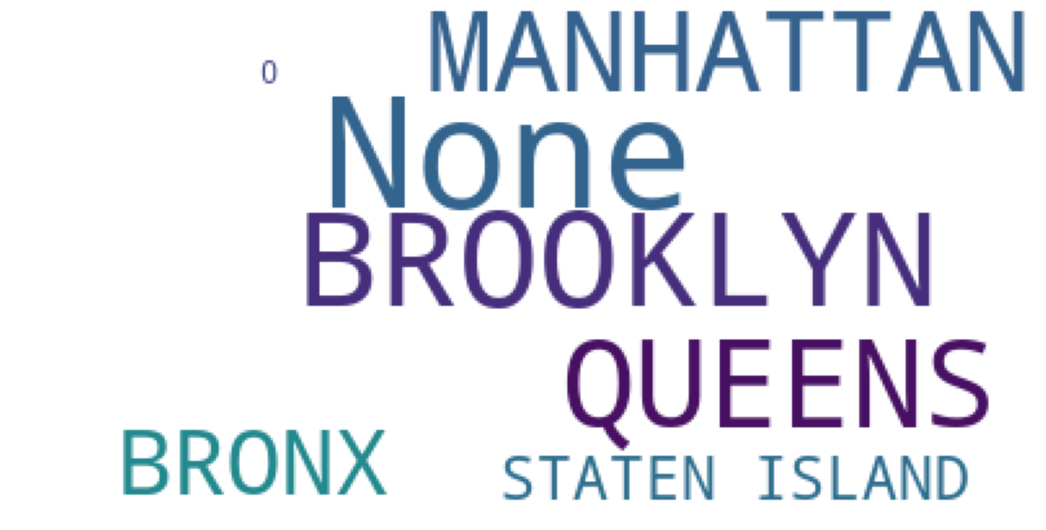

In [20]:
plt.imshow(word_cloud)
plt.axis( 'off')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
# fig.savefig('borough.png', dpi=100)
plt.show()

That is how you create a wordcloud from pandas dataframe using pyspark or python